In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro
import statsmodels

In [6]:
df_con=pd.read_csv('Concrete_Data_Yeh.csv')
df_con.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
df_con.shape

(1030, 9)

In [90]:
df_con.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [3]:
df_con.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [92]:
df_con.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

In [8]:
df_con=df_con.rename(columns={'csMPa':'Strength'})
df_con

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


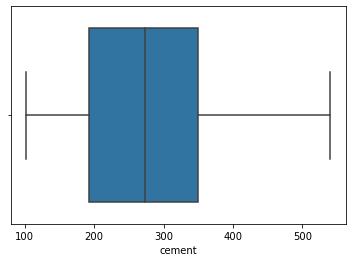

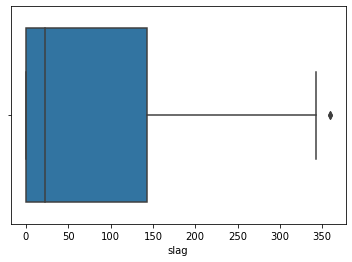

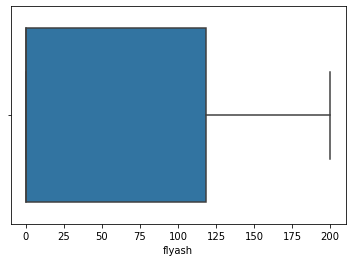

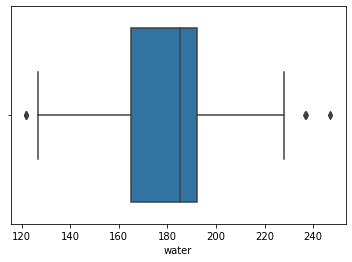

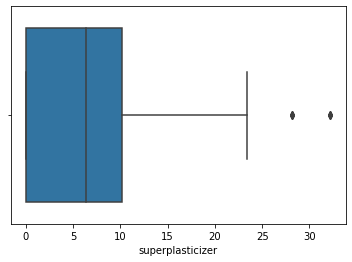

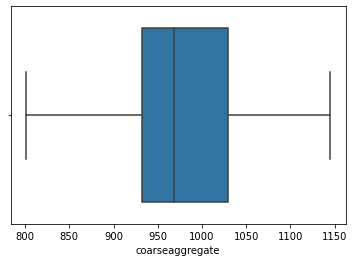

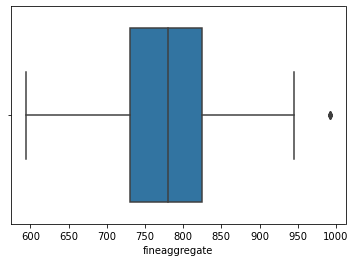

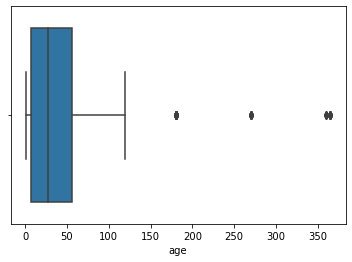

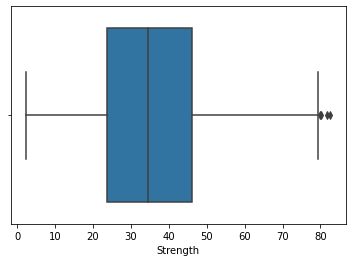

In [9]:
for col in df_con.columns:
    sns.boxplot(x=col,data=df_con)
    plt.show()

In [10]:
for col in df_con.columns:
    q1 = df_con[col].quantile(0.25)
    q3 = df_con[col].quantile(0.75)
    iqr = q3-q1
    ll = q1 - (1.5*iqr)
    ul = q3 + (1.5*iqr)
    for ind in df_con[col].index:
        if df_con.loc[ind,col]<ll:
            df_con.loc[ind,col]=ll
        if df_con.loc[ind,col]>ul:
            df_con.loc[ind,col]=ul

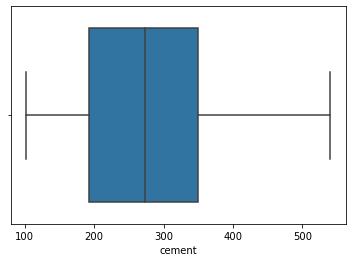

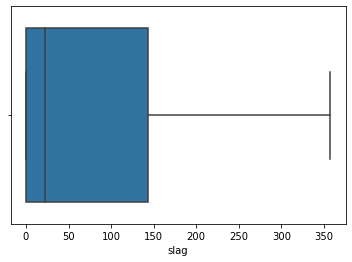

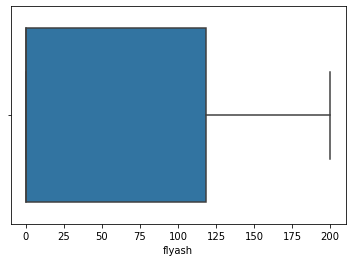

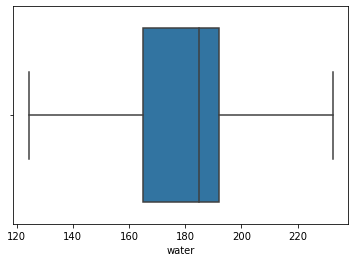

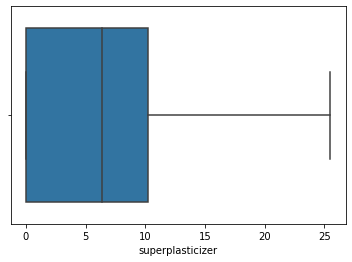

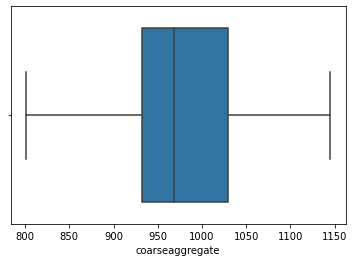

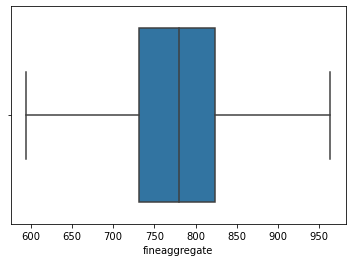

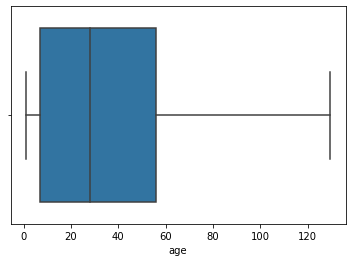

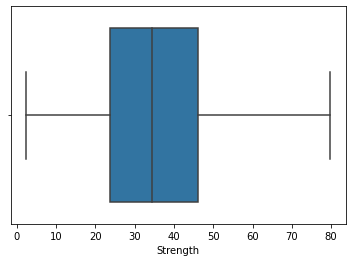

In [11]:
for col in df_con.columns:
    sns.boxplot(x=col,data=df_con)
    plt.show()

In [12]:
df_con['age'].value_counts()

28.0     425
3.0      134
7.0      126
56.0      91
14.0      62
129.5     59
90.0      54
100.0     52
91.0      22
120.0      3
1.0        2
Name: age, dtype: int64

<AxesSubplot:xlabel='age'>

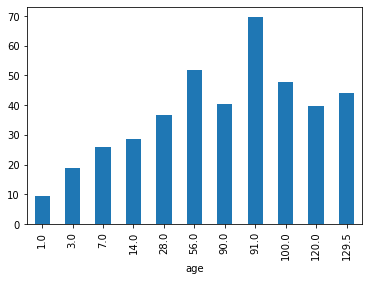

In [13]:
df_con.groupby('age')['Strength'].mean().plot(kind='bar')

In [14]:
df_con.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'Strength'],
      dtype='object')

In [15]:

df_con.groupby('cement')['Strength'].mean()

cement
102.0    13.747500
108.3    14.967500
116.0    17.435000
122.6    17.787500
132.0    33.305000
           ...    
522.0    62.750000
525.0    52.624286
528.0    56.830000
531.3    52.520000
540.0    64.270278
Name: Strength, Length: 278, dtype: float64

<AxesSubplot:xlabel='cement', ylabel='Count'>

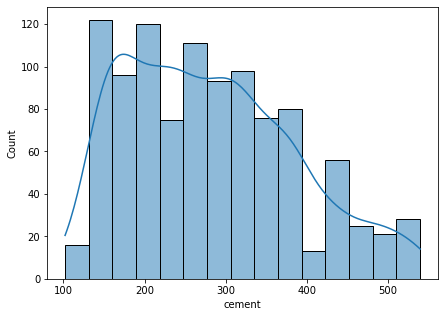

In [16]:
plt.figure(figsize=(7,5))
sns.histplot(df_con['cement'],kde=True)

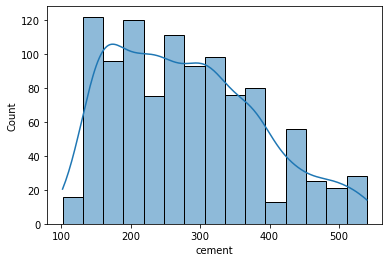

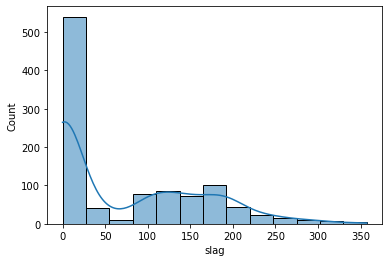

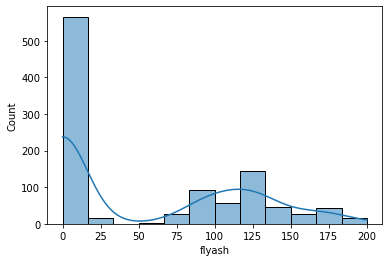

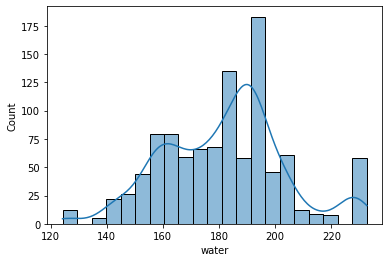

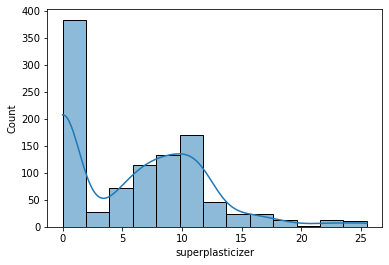

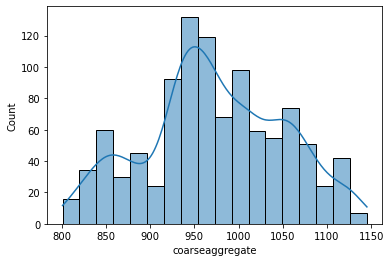

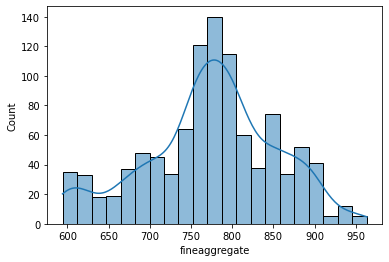

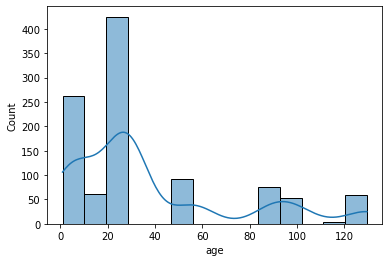

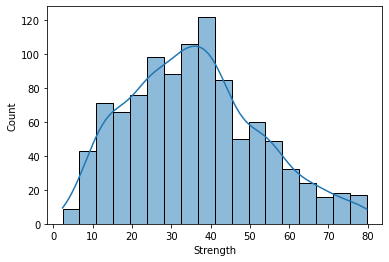

In [17]:
for col in df_con.columns:
    sns.histplot(x=col,data=df_con,kde=True)
    plt.show()

<AxesSubplot:>

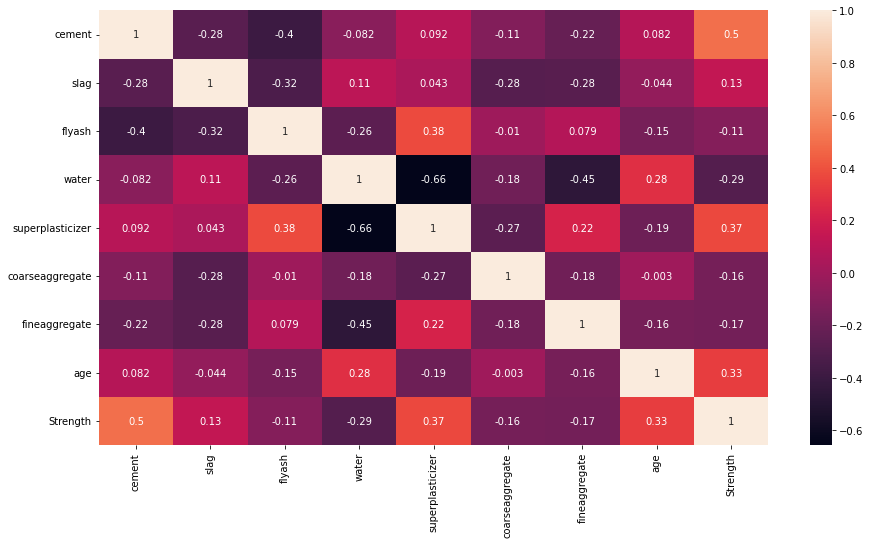

In [100]:
plt.figure(figsize=(15,8))
sns.heatmap(df_con.corr(),annot=True)

In [107]:
X=df_con.drop('Strength',1)
X

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,129.5
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0


In [108]:
y=df_con['Strength']
y

0       79.7725
1       61.8900
2       40.2700
3       41.0500
4       44.3000
         ...   
1025    44.2800
1026    31.1800
1027    23.7000
1028    32.7700
1029    32.4000
Name: Strength, Length: 1030, dtype: float64

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(721, 8)
(721,)
(309, 8)
(309,)


In [109]:
sc=StandardScaler()
x_train_sc=pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
x_test_sc=pd.DataFrame(sc.transform(x_test),columns=x_test.columns)

In [110]:
x_train.shape

(721, 6)

In [111]:
x_train_cn=sm.add_constant(x_train_sc)
x_test_cn=sm.add_constant(x_test_sc)

In [58]:
y_train=y_train.values.reshape(-1,1)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [59]:
model_full=sm.OLS(y_train,x_train_cn).fit()
model_full.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     359.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.85e-212
Time:                        14:36:46   Log-Likelihood:                -2559.4
No. Observations:                 721   AIC:                             5133.
Df Residuals:                     714   BIC:                             5165.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               35.5608      0.315    112.829      0.000      34.942      36.180
cement              11.6828      0.427     27.387      0.000      10.845      12.520
slag                 7.7346      0.413     18.736      0.000       6.924       8.545
flyash               4.5198      0.486      9.308      0.000       3.566       5.473
water               -4.1926      0.429     -9.768      0.000      -5.035      -3.350
superplasticizer     1.5699      0.498      3.156      0.002       0.593       2.547
age                  9.0214      0.321     28.127      0.000       8.392       9.651
==============================================================================
Omnibus:                        5.201   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                6.649
Skew:                           0.020   Prob(JB):                       0.0360
Kurtosis:                       3.469   Cond. No.                         3.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
pval=model_full.pvalues
impt_features = list(pval[pval<0.05].index)
print(impt_features)


['const', 'cement', 'slag', 'flyash', 'water', 'superplasticizer', 'age']


In [28]:
X=X[['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'age']]
X

,cement,slag,flyash,water,superplasticizer,age
0,540.0,0.0,0.0,162.0,2.5,28.0
1,540.0,0.0,0.0,162.0,2.5,28.0
2,332.5,142.5,0.0,228.0,0.0,129.5
3,332.5,142.5,0.0,228.0,0.0,129.5
4,198.6,132.4,0.0,192.0,0.0,129.5
...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,28.0
1026,322.2,0.0,115.6,196.0,10.4,28.0
1027,148.5,139.4,108.6,192.7,6.1,28.0
1028,159.1,186.7,0.0,175.6,11.3,28.0


In [29]:
y=df_con['Strength']
y

0       79.7725
1       61.8900
2       40.2700
3       41.0500
4       44.3000
         ...   
1025    44.2800
1026    31.1800
1027    23.7000
1028    32.7700
1029    32.4000
Name: Strength, Length: 1030, dtype: float64

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [31]:
sc=StandardScaler()
x_train_sc=pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
x_test_sc=pd.DataFrame(sc.transform(x_test),columns=x_test.columns)

In [32]:
x_train_cn=sm.add_constant(x_train_sc)
x_test_cn=sm.add_constant(x_test_sc)

In [33]:
y_train=y_train.values.reshape(-1,1)

In [34]:
model=sm.OLS(y_train,x_train_cn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     359.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.85e-212
Time:                        14:32:20   Log-Likelihood:                -2559.4
No. Observations:                 721   AIC:                             5133.
Df Residuals:                     714   BIC:                             5165.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               35.5608      0.315    112.829      0.000      34.942      36.180
cement              11.6828      0.427     27.387      0.000      10.845      12.520
slag                 7.7346      0.413     18.736      0.000       6.924       8.545
flyash               4.5198      0.486      9.308      0.000       3.566       5.473
water               -4.1926      0.429     -9.768      0.000      -5.035      -3.350
superplasticizer     1.5699      0.498      3.156      0.002       0.593       2.547
age                  9.0214      0.321     28.127      0.000       8.392       9.651
==============================================================================
Omnibus:                        5.201   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                6.649
Skew:                           0.020   Prob(JB):                       0.0360
Kurtosis:                       3.469   Cond. No.                         3.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Durbin Watson - 1.883
# There is no autocorrelation  - there is no relation b/w the errors.

In [35]:
#NORMALITY
from statsmodels.graphics.gofplots import qqplot

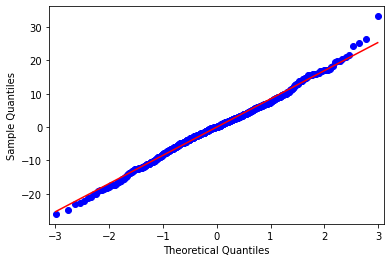

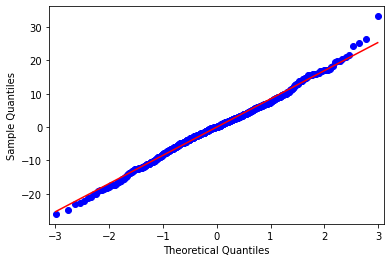

In [36]:
qqplot(model.resid,line='r')

In [112]:
#NORMALITY
stats.shapiro(model_full.resid)
## Data points are not falling on the therotical line(red line). So resisual is normal

ShapiroResult(statistic=0.9953103065490723, pvalue=0.02728058584034443)

In [116]:
model_full.resid

0      7.025827
1      1.654634
2      6.135075
3     -8.868631
4     -0.684566
         ...   
716    3.811925
717    8.514683
718    3.404501
719   -6.131545
720   -4.770822
Length: 721, dtype: float64

In [117]:
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [118]:
sms.het_breuschpagan(model_full.resid,model_full.model.exog)

(66.41517074465933,
 2.216739917317417e-12,
 12.073920698109397,
 5.990465375448591e-13)

In [119]:
np.format_float_positional(2.216739917317417e-12)

'0.000000000002216739917317417'

In [121]:
y_train_pred=model_full.predict(x_train_cn)
y_train_pred

0      17.424173
1      26.115366
2      20.904925
3      15.678631
4      54.074566
         ...    
716    37.118075
717    44.305317
718    36.255499
719    19.421545
720    22.610822
Length: 721, dtype: float64

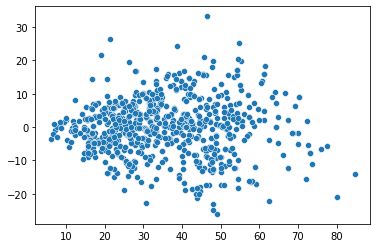

In [122]:
sns.scatterplot(x=y_train_pred,y =model_full.resid)
plt.show()

In [ ]:
# Linear Regression model follows the heterscedasticity assumption

In [71]:
model=LinearRegression()
model.fit(x_train_sc,y_train)

LinearRegression()

In [73]:
print('Train R^2:',model.score(x_train_sc,y_train))
print('Test R^2:',model.score(x_test_sc,y_test))

Train R^2: 0.7515107122551992
Test R^2: 0.6651300971200608


In [75]:
y_train_pred = model.predict(x_train_sc)
y_train_pred

array([[17.42417269],
       [26.11536589],
       [20.90492466],
       [15.67863114],
       [54.07456595],
       [33.28007016],
       [46.19401572],
       [29.90869865],
       [34.78308477],
       [16.89499452],
       [37.62971866],
       [18.23815288],
       [21.30959258],
       [24.98833667],
       [45.40617716],
       [41.98530502],
       [24.0623338 ],
       [54.23943838],
       [59.0516978 ],
       [42.20558647],
       [27.02667088],
       [15.66465046],
       [19.25644041],
       [27.9815318 ],
       [23.55125819],
       [18.38850967],
       [51.43204723],
       [53.50837034],
       [27.2538033 ],
       [20.25449895],
       [33.30655934],
       [25.28684724],
       [42.92789921],
       [30.56746622],
       [31.58551751],
       [22.87549962],
       [40.32429004],
       [54.67853388],
       [22.97643241],
       [20.62526372],
       [50.82784197],
       [48.10170804],
       [21.69830801],
       [32.42232928],
       [50.04688568],
       [26

In [76]:
x_train_sc.shape,y_train.shape

((721, 6), (721, 1))

In [77]:
y_test_pred=model_full.predict(x_test_cn)
y_test_pred.head()

0    28.785322
1    17.439172
2    23.023239
3    18.794367
4    34.797096
dtype: float64

In [78]:
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Train RMSE: 8.421746355564585
Test RMSE: 9.354002988711757


In [79]:
print('Train MAPE:',mean_absolute_percentage_error(y_train,y_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(y_test,y_test_pred))

Train MAPE: 0.23887102635919072
Test MAPE: 0.248644130173472


In [80]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(x_train_sc,y_train)

DecisionTreeRegressor()

In [81]:
y_pred=regressor.predict(x_test_sc)
y_pred

array([23.8       , 12.18      , 23.52      , 13.09      , 33.05      ,
       66.82      , 20.28      , 50.46      , 39.05      , 21.92      ,
       37.34      , 17.17      , 36.8       , 28.24      , 12.05      ,
       26.86      , 37.625     , 53.96      , 53.58      , 34.67      ,
       24.28      , 52.96      , 16.26      , 61.23      , 60.29      ,
       46.24      , 39.4       , 14.54      , 39.3       , 11.58      ,
       41.15      , 50.24      , 28.02      , 21.78      , 33.4       ,
       32.88      , 19.35      , 24.5       , 26.23      ,  9.85      ,
       35.1       , 15.46      , 52.83      , 40.06      , 34.67      ,
       29.87      , 31.84      , 19.01      , 34.4       , 48.99      ,
       24.48      , 32.07      , 67.11      , 55.16      , 68.5       ,
       10.03      , 35.1       , 22.72      , 29.23      , 42.55      ,
       48.795     , 41.84      , 54.32      , 53.77      , 21.91      ,
       33.76      , 43.915     , 31.27      , 37.43      , 24.28

In [82]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
339,21.91,23.80
244,19.93,12.18
882,36.44,23.52
567,11.96,13.09
923,39.84,33.05
...,...,...
1018,37.27,37.26
1015,52.43,52.42
341,47.40,51.33
750,44.09,44.13


In [83]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.8294050640848574

In [84]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [85]:
rf=RandomForestRegressor()
rf.fit(x_train_sc,y_train)

RandomForestRegressor()

In [86]:
y_pred=rf.predict(x_test_sc)
y_pred

array([23.0617    , 14.1526    , 23.36406667, 13.9579    , 33.7542    ,
       63.4986    , 19.76636   , 46.9397869 , 40.6674    , 19.7061    ,
       38.724875  , 13.3326    , 37.31346   , 30.22218333, 12.1633    ,
       28.3456    , 38.28248333, 54.5013    , 60.151325  , 32.0888    ,
       24.4305    , 50.9706    , 16.7618    , 59.286475  , 62.5078    ,
       43.211945  , 31.5364    , 26.83169167, 35.6798    , 12.8334    ,
       42.39357167, 51.328275  , 27.9865    , 21.2122    , 35.8762    ,
       36.8377    , 15.3734    , 25.169     , 25.64230167,  9.3199    ,
       32.305275  , 15.19360262, 49.0882    , 36.961125  , 32.2251    ,
       26.508475  , 32.119325  , 24.28198333, 32.8332    , 50.4487    ,
       25.8718    , 36.03195   , 62.9963    , 55.7116    , 60.99215   ,
        9.207     , 30.53835   , 24.2421    , 33.49376667, 44.5074    ,
       47.9385781 , 42.25756667, 51.85545   , 47.07125   , 26.91188167,
       34.1552    , 51.18195417, 36.0232    , 38.75943333, 26.66

In [87]:
score = r2_score(y_test,y_pred)
score

0.8753353946450901

In [88]:
gb=GradientBoostingRegressor()
gb.fit(x_train_sc,y_train)

GradientBoostingRegressor()

In [305]:
y_pred=gb.predict(x_test_sc)
y_pred

array([21.58624273, 13.34874538, 23.46556297, 15.12404452, 34.72759422,
       64.1283228 , 19.93102402, 48.71081941, 41.01726645, 20.81921404,
       38.15606944, 14.4398262 , 39.27763549, 32.19847661,  9.02686278,
       26.76430769, 38.27951159, 59.1580608 , 55.52171742, 35.10395309,
       23.17856171, 52.62830948, 17.77183376, 61.00925657, 60.05015811,
       40.02480074, 33.87680569, 27.88004098, 34.49956879, 14.02338552,
       42.01607917, 55.22488885, 29.97372986, 25.74714963, 35.62289147,
       38.83499516, 16.59293956, 27.66613387, 24.57299514, 15.53451801,
       41.01403967, 13.8238506 , 47.24711651, 38.40805007, 34.80076405,
       26.94137799, 33.70253325, 26.49374787, 33.18864655, 52.47378871,
       26.03856861, 35.92352527, 61.09455111, 52.47054015, 57.9973574 ,
        9.94192155, 39.16222835, 22.11717639, 30.51913675, 45.20246677,
       49.30863033, 43.48525839, 53.6702724 , 48.05314073, 20.74776397,
       35.12936027, 49.85770094, 35.55803734, 41.87926896, 26.79

In [89]:
score = r2_score(y_test,y_pred)
score

0.8753353946450901

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
tuned_parameter=[{'max_depth':[2, 3, 4, 5, 6, 7, 8]}]
model=GradientBoostingRegressor(random_state=10)
tree_grid=GridSearchCV(estimator=model,param_grid=tuned_parameter,cv=3)
tree_grid.fit(x_train,y_train)
tree_grid.best_params_

{'max_depth': 5}

In [92]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [93]:
from xgboost import XGBRegressor

In [94]:
XGB=XGBRegressor()

In [95]:
XGB.fit(x_train_sc,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [96]:
y_pred=XGB.predict(x_test_sc)
y_pred

array([22.457806 , 15.997628 , 21.623322 , 15.299233 , 34.81867  ,
       66.42505  , 16.195417 , 50.209038 , 42.87882  , 20.011854 ,
       34.076138 , 12.082429 , 40.12608  , 30.375246 , 11.142429 ,
       27.087397 , 37.564877 , 55.211147 , 58.691036 , 33.976948 ,
       22.785723 , 50.03766  , 17.601347 , 61.30013  , 58.50215  ,
       44.709484 , 38.364346 , 25.60996  , 38.97287  , 14.64547  ,
       41.28656  , 52.106728 , 28.351198 , 24.866055 , 33.806435 ,
       37.56031  , 19.751698 , 24.909538 , 26.011465 , 15.69124  ,
       29.035671 , 14.551752 , 45.01368  , 37.233673 , 32.327072 ,
       23.070517 , 31.892946 , 28.100851 , 26.61337  , 47.57175  ,
       24.952547 , 36.55955  , 66.653275 , 55.20349  , 56.3506   ,
       10.0469265, 40.263504 , 24.172077 , 31.964218 , 47.23036  ,
       48.80647  , 41.62494  , 54.6487   , 52.466316 , 22.065327 ,
       34.07507  , 52.84112  , 34.400883 , 38.24258  , 26.154505 ,
       33.245872 , 25.567177 , 37.56031  , 12.11413  , 74.3599

In [97]:
score = r2_score(y_test,y_pred)
score

0.9077828705148017

In [99]:
XGB.feature_importances_

array([0.2221429 , 0.11689106, 0.04045141, 0.12872823, 0.17017528,
       0.3216112 ], dtype=float32)

In [101]:
feature_imps = pd.Series(XGB.feature_importances_, index = X.columns)
feature_imps

cement              0.222143
slag                0.116891
flyash              0.040451
water               0.128728
superplasticizer    0.170175
age                 0.321611
dtype: float32

<AxesSubplot:>

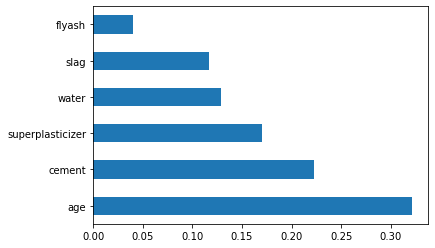

In [102]:
feature_imps.nlargest(8).plot(kind='barh')